# Assignment 1 (due October 2, 10 PM MT)

## Instructions - Read this First

### Intellectual Property

**The data used in this assignment is NOT open data**. It has been provided to us for educational purposes. It remains the sole possession of the University of Calgary, and therefore, you MUST NOT upload or publish this data non-privately (i.e. in a way where more parties besides yourself can access the contents) to a platform not supported or provided to you by the University. 

Additionally, you absolutely may not provide this data to any kind of generative AI tool, large language model, or any other third party who does not have a pre-existing business arrangement (i.e. a legally binding contract) with the University. If you are not sure whether such an arrangement exists, assume that it does not.

Students who are found to be in violation of these instructions may be subject to both the University's policy on academic misconduct (failure to follow instructions), as well as for [non-academic misconduct](https://www.ucalgary.ca/legal-services/university-policies-procedures/student-non-academic-misconduct-appendix-1-prohibited-conduct), for misuse of intellectual property. 

### Expectation of Individual Work

This is an individual homework assignment. This means that:
* You may discuss the problems in this assignment with other students in this course and your instructor/TA, but YOUR WORK MUST BE YOUR OWN.
* Do not show other students code or your own work on this assignment.
* You may consult external references, but not actively receive help from individuals not involved in this course. 
* Cite all references outside of the course you used, including conversations with other students which were helpful. (This helps us give credit where it is due!). All references must use a commonly accepted reference format, for example, APA or IEEE (or another citation style of your choice).

### Specific instructions for Use of Generative AI (Co-Pilot, ChatGPT, and others)

* You may not upload any provided data to any such tool.
* You may not copy output from any such tools directly into your assignment. You may use these tools to help you brainstorm or understand what steps you need to solve a provided problem 
* If you used generative AI  (for example ChatGPT or GitHub Co-Pilot) in this assignment, you must mark where it was used, and which product you used. **You must include a Markdown cell with a full listing of all prompts you used.**

If any of these rules seem ambiguous, please check your instructor or with Leanne Wu (lewu@ucalgary.ca) for help interpreting them.


In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl

## Introduction

In this assignment, you will be working with a dataset sourced courtesy of the [Office of Sustainability at the University of Calgary](https://www.ucalgary.ca/sustainability/campus-learning-lab), focused on daily utility usage of different on-campus buildings. Buildings on-campus may have different uses, such as for residences, to house classrooms, research, or administrative functions. Some buildings may feature a mix of different kinds of uses.

Numerous initiatives are underway to evaluate the on-campus use of utilities, and you may find this link to be useful to help contextualize the dataset you are using: https://www.ucalgary.ca/sustainability/our-sustainable-campus/climate-and-energy

You are using data from three different on-campus buildings, from 2017 to 2024, which consists of readings from meters measuring the chilled water use of each building (for cooling), the heating water use of each building (for heating), the electricty use of each building, and the domestic water use of each building (for consumption). 

While we will not identify these buildings in our work, you may find more about each on-campus building at this link:
https://www.ucalgary.ca/facilities/buildings-grounds/buildings

You may use built-in Python libraries, numpy, pandas, or matplotlib for your responses.

## Part A

First, let's read in our data. 

In [26]:
# do not modify this code
building_df = pd.read_csv("three_building_revised.csv", thousands=',')

### Question 1. 

Your first task will be to learn a bit more about this datset. 

a) First, convert the datatype in the date column to an appropriate datatype. You may choose to do this in-place, if an appropriate method exists. What datatype and method did you use, and why? (**2 points**)

In [27]:

building_df['Date']= pd.to_datetime(building_df['Date'])

building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7944 non-null   datetime64[ns]
 1   Building code        7944 non-null   object        
 2   Heating 
(kWh)       7940 non-null   object        
 3   Cooling 
(kWh)       7942 non-null   float64       
 4   Electricity
(kWh)    7944 non-null   float64       
 5   Natural Gas
(kWh)    7944 non-null   object        
 6   Domestic Water
(m3)  2648 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 434.6+ KB


### Part A Q1 Answer 
The reason why I used a datetime datatype is because since the values are a date, it will help me prep the data incase i ever want to maniplultate or extract values such as day, month or year or look at how many days are inbetween dates.

b) Identify the range of dates which apply to this dataset. What is the earliest date, and what is the latest date? (**1 point**)

In [28]:
# Your code here. Use a comment to include the earliest and the latest dates.
print(f"Earliest Date is {min(building_df['Date'])}")
print(f"Latest Data is {max(building_df['Date'])}")

Earliest Date is 2017-04-01 00:00:00
Latest Data is 2024-06-30 00:00:00


c) Identify any dates where data does not exist for all three buildings, if any. (**1 point**)

In [29]:

dates = building_df[
    (building_df['Heating \n(kWh)'].isnull()) | 
    (building_df['Cooling \n(kWh)'].isnull()) |
    (building_df['Electricity\n(kWh)'].isnull()) |
    (building_df['Natural Gas\n(kWh)'].isnull()) |
    (building_df['Domestic Water\n(m3)'].isnull())
]

dates_grouped = dates.groupby('Date')['Building code'].unique().reset_index()

print(dates_grouped[dates_grouped['Building code'].isin(['A', 'B', 'C'])])


# There is no null values for the dates * ASK THE PROF * 

Empty DataFrame
Columns: [Date, Building code]
Index: []


### Question 2. 

a) Identify all instances of data which are not numeric characters in this dataset, with the exception of the header row. (**1 point**)

In [30]:
building_df.head()

building_df.applymap(np.isreal)

# https://stackoverflow.com/questions/46856988/np-isreal-behavior-different-in-pandas-dataframe-and-numpy-array
# Looking at the table below, the non numerical datasets are building code, Utilites Heating and Natural gas. If the values are FALSE being non numeric and if TRUE numeric.
# *Note* after question 1, date in now numeric. 

/var/folders/dv/fxxthl6j34z_921cs3vs3jkw0000gn/T/ipykernel_87176/4011532602.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  building_df.applymap(np.isreal)


,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
0,True,False,False,True,True,False,True
1,True,False,False,True,True,False,True
2,True,False,False,True,True,False,True
3,True,False,False,True,True,False,True
4,True,False,False,True,True,False,True
...,...,...,...,...,...,...,...
7939,True,False,False,True,True,False,True
7940,True,False,False,True,True,False,True
7941,True,False,False,True,True,False,True
7942,True,False,False,True,True,False,True


b) There are numerous ways to handle this kind of data, including using the existing placeholder, or selecting something of your own. 

Perform any such replacement of placeholders in the cell, if necessary.


What is the placeholder (if any) you are using for this data? Briefly justify your answer. (**2 points**)

(_Hint: think about what will make your work later on easier. Consider if what you do will have an effect on the results of any analysis happening later in this assignment._)

In [31]:

# First I converted the non numeric values to floats 
nonnumeric  = ['Heating \n(kWh)', 'Natural Gas\n(kWh)']

building_df[nonnumeric] = building_df[nonnumeric].replace(",", "", regex= True)
building_df[nonnumeric] = building_df[nonnumeric].replace({"-": np.nan, "": np.nan}, regex= True)
building_df[nonnumeric ] = building_df[nonnumeric ].astype(float)
# https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

In [32]:
building_df.fillna(0, inplace=True)
building_df.isnull().sum()

Date                    0
Building code           0
Heating \n(kWh)         0
Cooling \n(kWh)         0
Electricity\n(kWh)      0
Natural Gas\n(kWh)      0
Domestic Water\n(m3)    0
dtype: int64

### Part A Q2 Answer

The first step I took was converting the non-numeric values to a numeric datatype. This simplifies my later analysis, such as calculating averages or parsing through the values. I decided to retain the NA values as 0, as this might represent no utility usage. This approach allows me to include these variables in the analysis rather than dropping them altogether. However, by replacing NA with 0, there is a risk of distorting the data by assigning a value to buildings that may not have had actual usage. I opted not to fill in these gaps with an average or other values, especially for variables like domestic water, where it’s possible the building wasn’t operational yet, which would explain the lack of usage. I didn’t want to make assumptions about the data without fully understanding its context.

### Question 3

a) There are instances in this dataset where the utilty usage for a certain type of utility may be 0. Identify periods of ten days or more in this dataset where utility usage (for any utility) was 0. For each of these, identify which building, the start date, the end date, and the utility. (**4 points**)

In [33]:

def question3(dataframe):
    # This is the export data
    Data = []
    # setting counts for each utility type 
    count = {'Heating \n(kWh)':0,'Natural Gas\n(kWh)': 0, 'Cooling \n(kWh)': 0, 'Electricity\n(kWh)': 0, 'Domestic Water\n(m3)': 0}
    # settings start dates to refer to 
    start = {'Heating \n(kWh)':None,'Natural Gas\n(kWh)': None, 'Cooling \n(kWh)': None, 'Electricity\n(kWh)': None, 'Domestic Water\n(m3)': None}
    # setting building codes
    buildingcode = {'Heating \n(kWh)':None, 'Natural Gas\n(kWh)': None, 'Cooling \n(kWh)': None, 'Electricity\n(kWh)': None, 'Domestic Water\n(m3)': None}

    for i in range(len(dataframe)):
    
        # ------------------------ Natural Gas Section ----------------------
        # if natural gas is 0
        if dataframe.iloc[i]['Heating \n(kWh)'] == 0.00 :
            # it will trigger a count 
            count['Heating \n(kWh)'] += 1
            # if it has not set what the building and start date is yet, meaning a new 0 value 
            if start['Heating \n(kWh)'] is None:
                # we set it here
                start['Heating \n(kWh)'] = dataframe.iloc[i]['Date']
                buildingcode['Heating \n(kWh)'] = dataframe.iloc[i]['Building code']
        else:
            # now it will check from all the counts it found for just natural gas in the building code, is it >= 10, if so add it to the list with the data 
            if count['Heating \n(kWh)'] >= 10:
                Data.append({
                    "Building": buildingcode['Heating \n(kWh)'],
                    "Start Date": start['Heating \n(kWh)'],
                    "End Date": dataframe.iloc[i - 1]["Date"],
                    "Utility": 'Heating \n(kWh)'
                })
            # Now we reset the values to find the next outage 
            count['Heating \n(kWh)'] = 0
            start['Heating \n(kWh)'] = None
            buildingcode['Heating \n(kWh)'] = None



        # ------------------------ Natural Gas Section ----------------------
        # if natural gas is 0
        if dataframe.iloc[i]['Natural Gas\n(kWh)'] == 0.00 :
            # it will trigger a count 
            count['Natural Gas\n(kWh)'] += 1
            # if it has not set what the building and start date is yet, meaning a new 0 value 
            if start['Natural Gas\n(kWh)'] is None:
                # we set it here
                start['Natural Gas\n(kWh)'] = dataframe.iloc[i]['Date']
                buildingcode['Natural Gas\n(kWh)'] = dataframe.iloc[i]['Building code']
        else:
            # now it will check from all the counts it found for just natural gas in the building code, is it >= 10, if so add it to the list with the data 
            if count['Natural Gas\n(kWh)'] >= 10:
                Data.append({
                    "Building": buildingcode['Natural Gas\n(kWh)'],
                    "Start Date": start['Natural Gas\n(kWh)'],
                    "End Date": dataframe.iloc[i - 1]["Date"],
                    "Utility": 'Natural Gas\n(kWh)'
                })
            # Now we reset the values to find the next outage 
            count['Natural Gas\n(kWh)'] = 0
            start['Natural Gas\n(kWh)'] = None
            buildingcode['Natural Gas\n(kWh)'] = None

        # ------------------------- Cooling Section ------------------------

        if dataframe.iloc[i]['Cooling \n(kWh)'] == 0.00:
            count['Cooling \n(kWh)'] += 1
            if start['Cooling \n(kWh)'] is None:
                start['Cooling \n(kWh)'] = dataframe.iloc[i]['Date']
                buildingcode['Cooling \n(kWh)'] = dataframe.iloc[i]['Building code']
        else:
            if count['Cooling \n(kWh)'] >= 10:
                Data.append({
                    "Building": buildingcode['Cooling \n(kWh)'],
                    "Start Date": start['Cooling \n(kWh)'],
                    "End Date": dataframe.iloc[i - 1]["Date"],
                    "Utility": 'Cooling \n(kWh)'
                })
            count['Cooling \n(kWh)'] = 0
            start['Cooling \n(kWh)'] = None
            buildingcode['Cooling \n(kWh)'] = None

        # ------------------------- Electricity Section ------------------------
        
        if dataframe.iloc[i]['Electricity\n(kWh)'] == 0.00:
            count['Electricity\n(kWh)'] += 1
            if start['Electricity\n(kWh)'] is None:
                start['Electricity\n(kWh)'] = dataframe.iloc[i]['Date']
                buildingcode['Electricity\n(kWh)'] = dataframe.iloc[i]['Building code']
            
        else:
            if count['Electricity\n(kWh)'] >= 10:
                Data.append({
                    "Building": buildingcode['Electricity\n(kWh)'],
                    "Start Date": start['Electricity\n(kWh)'],
                    "End Date": dataframe.iloc[i - 1]["Date"],
                    "Utility": 'Electricity\n(kWh)'
                })
            count['Electricity\n(kWh)'] = 0
            start['Electricity\n(kWh)'] = None
            buildingcode['Electricity\n(kWh)'] = None

        # ------------------------- Domestic Water Section ------------------------

        if dataframe.iloc[i]['Domestic Water\n(m3)'] == 0.00:

            count['Domestic Water\n(m3)'] += 1

            if start['Domestic Water\n(m3)'] is None:
                start['Domestic Water\n(m3)'] = dataframe.iloc[i]['Date']
                buildingcode['Domestic Water\n(m3)'] = dataframe.iloc[i]['Building code']
        else:
            if count['Domestic Water\n(m3)'] >= 10:
                Data.append({
                    "Building": buildingcode['Domestic Water\n(m3)'],
                    "Start Date": start['Domestic Water\n(m3)'],
                    "End Date": dataframe.iloc[i - 1]["Date"],
                    "Utility": 'Domestic Water\n(m3)'
                })
            count['Domestic Water\n(m3)'] = 0
            start['Domestic Water\n(m3)'] = None
            buildingcode['Domestic Water\n(m3)'] = None

    # Last check for any ongoing outages after the loop ends
    for utility in count.keys():
            if count[utility] >= 10:
                Data.append({
                    "Building": buildingcode[utility],
                    "Start Date": start[utility],
                    "End Date": dataframe.iloc[-1]['Date'],
                    "Utility": utility
                })

    return Data

# Example usage
pd.DataFrame(question3(building_df))

# References:
# Chat GPT refernce to question asked
# https://chatgpt.com/share/66fcb1c8-3a48-8002-bce7-6423a5be83fc




,Building,Start Date,End Date,Utility
0,A,2019-07-19,2019-08-05,Heating \n(kWh)
1,A,2020-05-25,2020-06-20,Natural Gas\n(kWh)
2,A,2020-07-08,2020-07-20,Natural Gas\n(kWh)
3,A,2020-07-31,2020-09-22,Natural Gas\n(kWh)
4,A,2020-12-25,2021-01-04,Cooling \n(kWh)
5,A,2021-02-05,2021-02-14,Cooling \n(kWh)
6,A,2021-03-13,2021-03-24,Natural Gas\n(kWh)
7,A,2021-03-31,2021-04-12,Natural Gas\n(kWh)
8,A,2021-04-14,2021-04-23,Natural Gas\n(kWh)
9,A,2021-06-20,2021-07-20,Natural Gas\n(kWh)


b) Take one of these instances and do the following in your answer:
- identify which building, which utility and when this instance was
- describe at least two different alternatives you think would be reasonable for handling this data. 
(**3 points**)

 ### b) Answer - 
 
 ### Case one: 

Building C experienced 17 days of a heating outage from 2023-12-07 to 2023-12-23. One possible explanation for this is that, due to the colder season, the heating system may have failed, as extreme cold can cause malfunctions. This happens alot durring the winter, and could be the cause of the outage.
 
 ### Case two: 
Another possibility is that fewer people were present in the school during this period, leading to no usage of the heating water system in Building C. 


NOTE: However, there could be a range of other factors at play. Additionally, the issue might stem from how I handled missing data. I replaced null values with 0, so Building C might have had heating water, but it was recorded as zero due to a lack of data during that time.


c) Which of these alternatives do think would be the most reasonable? Why is that? (**1 point**)

(_Hint: Consider if the usage of the utility makes sense given the time of year. Seasonality, and semester may have an impact. There may be particular non-repeating events - such as a pandemic - which may affect utility use. It may also be the case that a meter is not reporting data correctly, or that some other error in data collection has occurred. Again, think about what the impact of your technique for handling this data may be on future analysis, and if this is desireable or not._)

### c) Answer

I think the more reasonable one would be the system not working. But saying that, beause its an extensive amount of time, it would be a building that isnt used for residental use because then the maintenance team would have fixed it much faster. Potentailly a building of classes that they didnt need heating systems that fast, but broke down due to the weather or lack of maintinance. Again as i mentioned, this could also be largley due to my handling of the data.


### Question 4




Reshape your dataframe (in-place), so that you have columns of columns. Your outer set of columns should be the building, your inner set of columns should be the utility, and your rows should be the date. (**1 point**)


In [34]:
# Had to flatten the table so that the building type would be on the outside 

reshaped= building_df.melt(id_vars=['Date', 'Building code'], 
                           var_name='Utility', 
                           value_name='Usage').pivot_table(index='Date', columns=['Building code', 'Utility'], values='Usage')

reshaped

#https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html


Building code               A                                          \
Utility       Cooling \n(kWh) Domestic Water\n(m3) Electricity\n(kWh)   
Date                                                                    
2017-04-01            2675.74                53.77           12519.94   
2017-04-02            2007.54                49.38           17208.29   
2017-04-03            2048.57                96.73           17527.53   
2017-04-04            3308.77                85.67           16513.56   
2017-04-05            6312.75                85.67           15682.67   
...                       ...                  ...                ...   
2024-06-26           13821.23                25.45           24644.13   
2024-06-27            9929.25                20.70           24824.28   
2024-06-28           11195.31                16.10           24149.17   
2024-06-29           14509.95                18.09           22070.69   
2024-06-30           11766.80                18.09           22267.44   

Building code                                                  B  \
Utility       Heating \n(kWh) Natural Gas\n(kWh) Cooling \n(kWh)   
Date                                                               
2017-04-01           21455.57            1891.68         4158.34   
2017-04-02           25966.69            2408.35         5733.34   
2017-04-03           35061.14            2483.35         8011.12   
2017-04-04           34313.92            2411.13         7663.90   
2017-04-05           31045.86               0.00         5688.89   
...                       ...                ...             ...   
2024-06-26             247.22               0.00         4806.37   
2024-06-27             290.28               0.00         6705.35   
2024-06-28            1950.00               0.00         5163.95   
2024-06-29            2263.89               0.00         3340.85   
2024-06-30            1786.11               0.00         3277.83   

Building code                                                          \
Utility       Domestic Water\n(m3) Electricity\n(kWh) Heating \n(kWh)   
Date                                                                    
2017-04-01                     0.0            6979.12            0.00   
2017-04-02                     0.0            7312.12            0.00   
2017-04-03                     0.0            9587.10            0.00   
2017-04-04                     0.0            9568.15            0.00   
2017-04-05                     0.0            8954.32            0.00   
...                            ...                ...             ...   
2024-06-26                     0.0            5865.09         9387.94   
2024-06-27                     0.0            5858.84         5459.96   
2024-06-28                     0.0            5390.44         6817.76   
2024-06-29                     0.0            4741.33         5103.89   
2024-06-30                     0.0            4740.73         4774.49   

Building code                                  C                       \
Utility       Natural Gas\n(kWh) Cooling \n(kWh) Domestic Water\n(m3)   
Date                                                                    
2017-04-01                   0.0         1652.78                  0.0   
2017-04-02                   0.0         2794.45                  0.0   
2017-04-03                   0.0         2694.45                  0.0   
2017-04-04                   0.0         2502.78                  0.0   
2017-04-05                   0.0         1968.05                  0.0   
...                          ...             ...                  ...   
2024-06-26                   3.6          183.33                  0.0   
2024-06-27                   3.5          680.56                  0.0   
2024-06-28                   2.2          472.22                  0.0   
2024-06-29                   0.5          211.11                  0.0   
2024-06-30                   0.8          233.33    

## Part B

### Question 1

Take a look at the data for Building A, specifically the data for January 25 to June 27 2024. Does this data repeat anywhere else in the dataset? 

If you found something unusual, why do you think this happened? (_Hint: Do you think this anomaly occurred at the point of collection, if it is purely coincedental, or if perhaps there has been a previous attempt to clean this data? Try to support your guess with a reason which makes sense to you_) (**6 points**)

In [35]:

Q1 = building_df[(building_df['Building code'] == 'A') & (building_df['Date'] >= '2024-01-25') & (building_df['Date'] <= '2024-06-27')]
Q1

,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
2490,2024-01-25,A,4861.12,0.00,26909.15,1047.22,69.74
2491,2024-01-26,A,4311.11,0.00,26470.11,1563.89,74.75
2492,2024-01-27,A,2902.78,0.00,22472.79,1150.00,77.93
2493,2024-01-28,A,6775.01,0.00,21755.72,963.89,68.44
2494,2024-01-29,A,12688.90,0.00,25846.60,1005.56,83.72
...,...,...,...,...,...,...,...
2640,2024-06-23,A,694.45,17118.28,22035.99,0.00,19.66
2641,2024-06-24,A,388.89,15743.78,24546.82,0.00,30.59
2642,2024-06-25,A,183.33,14805.95,24620.55,0.00,20.19
2643,2024-06-26,A,247.22,13821.23,24644.13,0.00,25.45


In [36]:
# Checking Duplicates in each column 

duplicates = Q1[Q1.duplicated(subset=['Heating \n(kWh)'], keep=False)]

duplicates.sort_values(by='Heating \n(kWh)')


# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python


,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
2607,2024-05-21,A,61.11,7057.15,24865.68,372.22,80.64
2625,2024-06-08,A,61.11,7523.13,21903.45,1183.33,26.36
2621,2024-06-04,A,97.22,12417.42,25678.82,302.78,58.87
2627,2024-06-10,A,97.22,12862.89,24819.20,494.44,42.98
2594,2024-05-08,A,694.45,4818.09,26409.06,0.00,20.68
2640,2024-06-23,A,694.45,17118.28,22035.99,0.00,19.66
2564,2024-04-08,A,855.56,5476.03,27974.16,919.45,71.27
2605,2024-05-19,A,855.56,5496.55,21981.34,652.78,78.34


In [37]:
duplicates = Q1[Q1.duplicated(subset=['Cooling \n(kWh)'], keep=False)]

duplicates.sort_values(by='Cooling \n(kWh)')


# it looks like they downfilled the cooling utility to fill in missing values. 

,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
2490,2024-01-25,A,4861.12,0.00,26909.15,1047.22,69.74
2523,2024-02-27,A,7847.23,0.00,29512.12,218.06,70.34
2524,2024-02-28,A,8086.12,0.00,29130.32,325.69,74.65
2525,2024-02-29,A,9219.45,0.00,28897.25,433.33,77.24
2526,2024-03-01,A,7963.90,0.00,29082.58,1205.56,68.68
2527,2024-03-02,A,4816.67,0.00,26435.89,1116.67,67.14
2528,2024-03-03,A,6638.89,0.00,25967.62,2300.00,65.76
2529,2024-03-04,A,9716.67,0.00,29229.24,2325.00,77.79
2531,2024-03-06,A,12000.01,0.00,28615.67,1586.11,91.39
2532,2024-03-07,A,11183.34,0.00,29573.02,297.22,79.37


In [38]:
duplicates = Q1[Q1.duplicated(subset=['Electricity\n(kWh)'], keep=False)]

duplicates.sort_values(by='Electricity\n(kWh)')

#No duplicates in electricity 


,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)


In [39]:
duplicates = Q1[Q1.duplicated(subset=['Natural Gas\n(kWh)'], keep=False)]

duplicates.sort_values(by='Natural Gas\n(kWh)')

#Lots of duplicating from the natural gas utility. 


,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
2593,2024-05-07,A,244.44,3650.20,26173.36,0.00,20.68
2570,2024-04-14,A,5055.56,5979.03,24617.62,0.00,68.43
2571,2024-04-15,A,3558.34,6573.46,27582.23,0.00,68.43
2587,2024-05-01,A,463.89,1934.27,26410.82,0.00,19.06
2643,2024-06-26,A,247.22,13821.23,24644.13,0.00,25.45
2594,2024-05-08,A,694.45,4818.09,26409.06,0.00,20.68
2597,2024-05-11,A,1725.00,9664.02,23492.72,0.00,24.74
2598,2024-05-12,A,1241.67,9109.38,23173.34,0.00,24.74
2617,2024-05-31,A,236.11,8384.76,24764.26,0.00,46.23
2569,2024-04-13,A,5208.34,5203.61,24923.06,0.00,68.43


In [40]:
duplicates = Q1[Q1.duplicated(subset=['Domestic Water\n(m3)'], keep=False)]

duplicates.sort_values(by='Domestic Water\n(m3)')

#Lots of duplicating from the natural gas utility. 

,Date,Building code,Heating \n(kWh),Cooling \n(kWh),Electricity\n(kWh),Natural Gas\n(kWh),Domestic Water\n(m3)
2587,2024-05-01,A,463.89,1934.27,26410.82,0.00,19.06
2586,2024-04-30,A,1355.56,2277.16,27354.68,1311.11,19.06
2640,2024-06-23,A,694.45,17118.28,22035.99,0.00,19.66
2638,2024-06-21,A,1566.67,11904.55,24445.22,0.00,19.66
2639,2024-06-22,A,961.11,17598.92,22624.43,0.00,19.66
2593,2024-05-07,A,244.44,3650.20,26173.36,0.00,20.68
2594,2024-05-08,A,694.45,4818.09,26409.06,0.00,20.68
2591,2024-05-05,A,452.78,931.97,22571.65,1075.00,20.68
2592,2024-05-06,A,591.67,2482.31,25896.48,733.33,20.68
2598,2024-05-12,A,1241.67,9109.38,23173.34,0.00,24.74


### Part B Q1 Answer

The reason i look at duplicates is because no two months or time frames should ever have the same kilowatts of enegry, or if so that chances are extremely low. Therefor seeing multiple duplicates would concern me and alert that something was done to adjust the data. The one utility that had the most was domestic waters, because they have had so many 0s in the past, looks like they may have down or up filled some of the empty values, therefore creating lots of duplicates. 

### Question 2

Another anomaly may have happened for Building A, in which a new addition to the building was opened. To exammine the impact of this, calculate the average utility use as a running average in 30-day increments, 90-day increments, and 180-day increments, across the span of data. 

(_Note: There are numerous ways to calculate moving averages using both `numpy` and `pandas`. If you are not feeling challenged by this assignment, you can take some time to investigate these more thoroughly_)

In what time period do you think this new addition may have opened? Keep in mind that such projects may not have a single date in which all systems come online, but rather there may be a time period in which the use of the new addition gradually ramps up in phases.

You may use an appropriate plot to back up your reasoning. (**15 points**)

In [41]:
building= building_df.melt(id_vars=['Date', 'Building code'], 
                           var_name='Utility', 
                           value_name='Usage')

# began by flattening the data. I find it easier to manipulate this way 

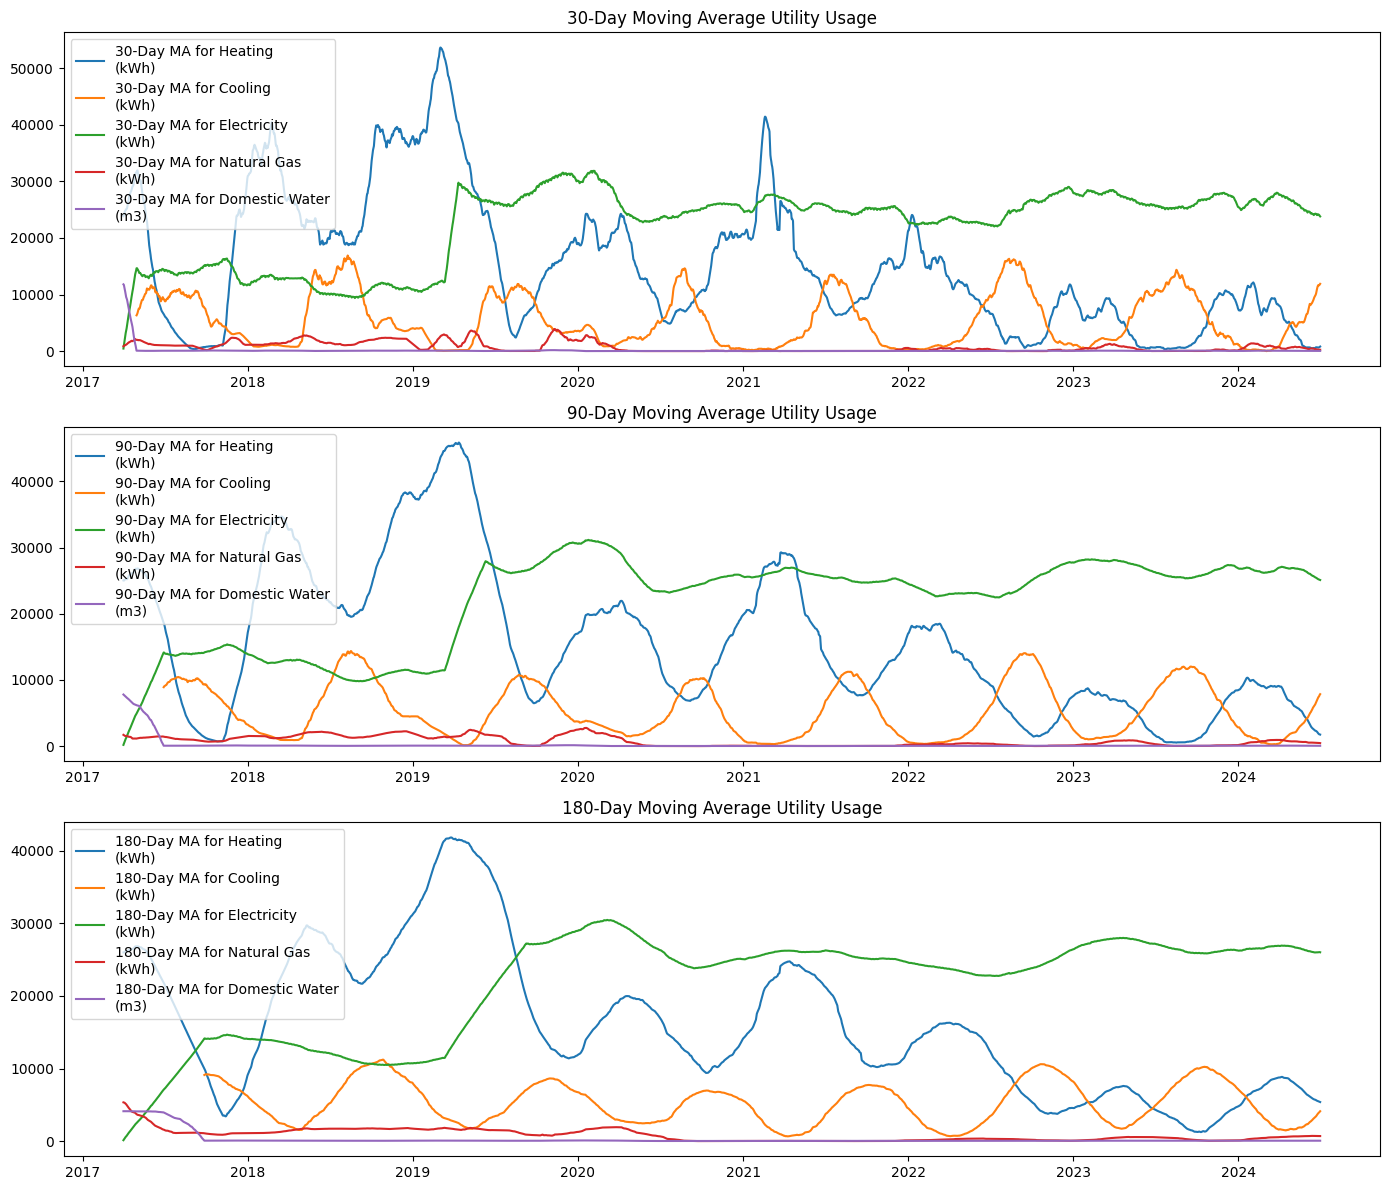

In [42]:

import matplotlib.pyplot as plt

# Filtering for only building A 
buildingA = building[(building['Building code'] == 'A')]

# set date as an index

buildingA.set_index('Date', inplace=True)

# grouping by Utility and calculating the daily average usage
buildingA_moving_avg = buildingA.groupby('Utility')['Usage'].resample('D').mean()

# creating a moving rolling average

movingavg30 = buildingA_moving_avg.rolling(window=30).mean()
movingavg90= buildingA_moving_avg.rolling(window=90).mean()
movingavg180= buildingA_moving_avg.rolling(window=180).mean()

# sizing of the plot 
plt.figure(figsize=(14, 12))

# Plotting the moving averages based on the unique utility it finds in each column 
for utility in buildingA['Utility'].unique():
    plt.subplot(3, 1, 1)
    plt.plot(movingavg30[utility], label=f'30-Day MA for {utility}')
    plt.title('30-Day Moving Average Utility Usage')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(movingavg90[utility], label=f'90-Day MA for {utility}')
    plt.title('90-Day Moving Average Utility Usage')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(movingavg180[utility], label=f'180-Day MA for {utility}')
    plt.title('180-Day Moving Average Utility Usage')
    plt.legend()

plt.tight_layout()
plt.show()


# References: 

# how to use rolling mean:
# https://www.statology.org/rolling-mean-pandas/

# Chat GPT help on graphs: 
# promp - guide me in coding the graphs for a moving average
# https://chatgpt.com/share/66fcb8f3-a4bc-8002-a0d3-c2e5ab6d81e0



### Part B Q2 Answer 

In 2019, there appears to be a significant increase in electricity usage, which could be due to a new section of the building opening and increased activity. The electricity consumption jumps from a steady 10,000–20,000 kWh to consistently over 30,000 kWh. This suggests that more lights and systems were in use, or electricity was highly operated. A similar story can be seen with the large increase in heating in 2019, which could either be related to construction processes or increased student occupancy in the building.

We also know that the COVID-19 pandemic followed shortly after this period. The electricity usage spikes significantly while the school was open, then drops sharply. This pattern could explain the sudden surge, followed by a steep decline. Therefore, it's likely that the new addition opened in mid 2019, then declined when school shut down, which then led to the initial jump in consumption.

### Question 3

In separate plots for each building, plot the heating water use and the chilled water use in the same plot. You may pick an increment of time which you feel is reasonable.(**10 points**)

What kind of trends do you think you spot in the use of heating or chilled water? Consider the impact of seasonality.

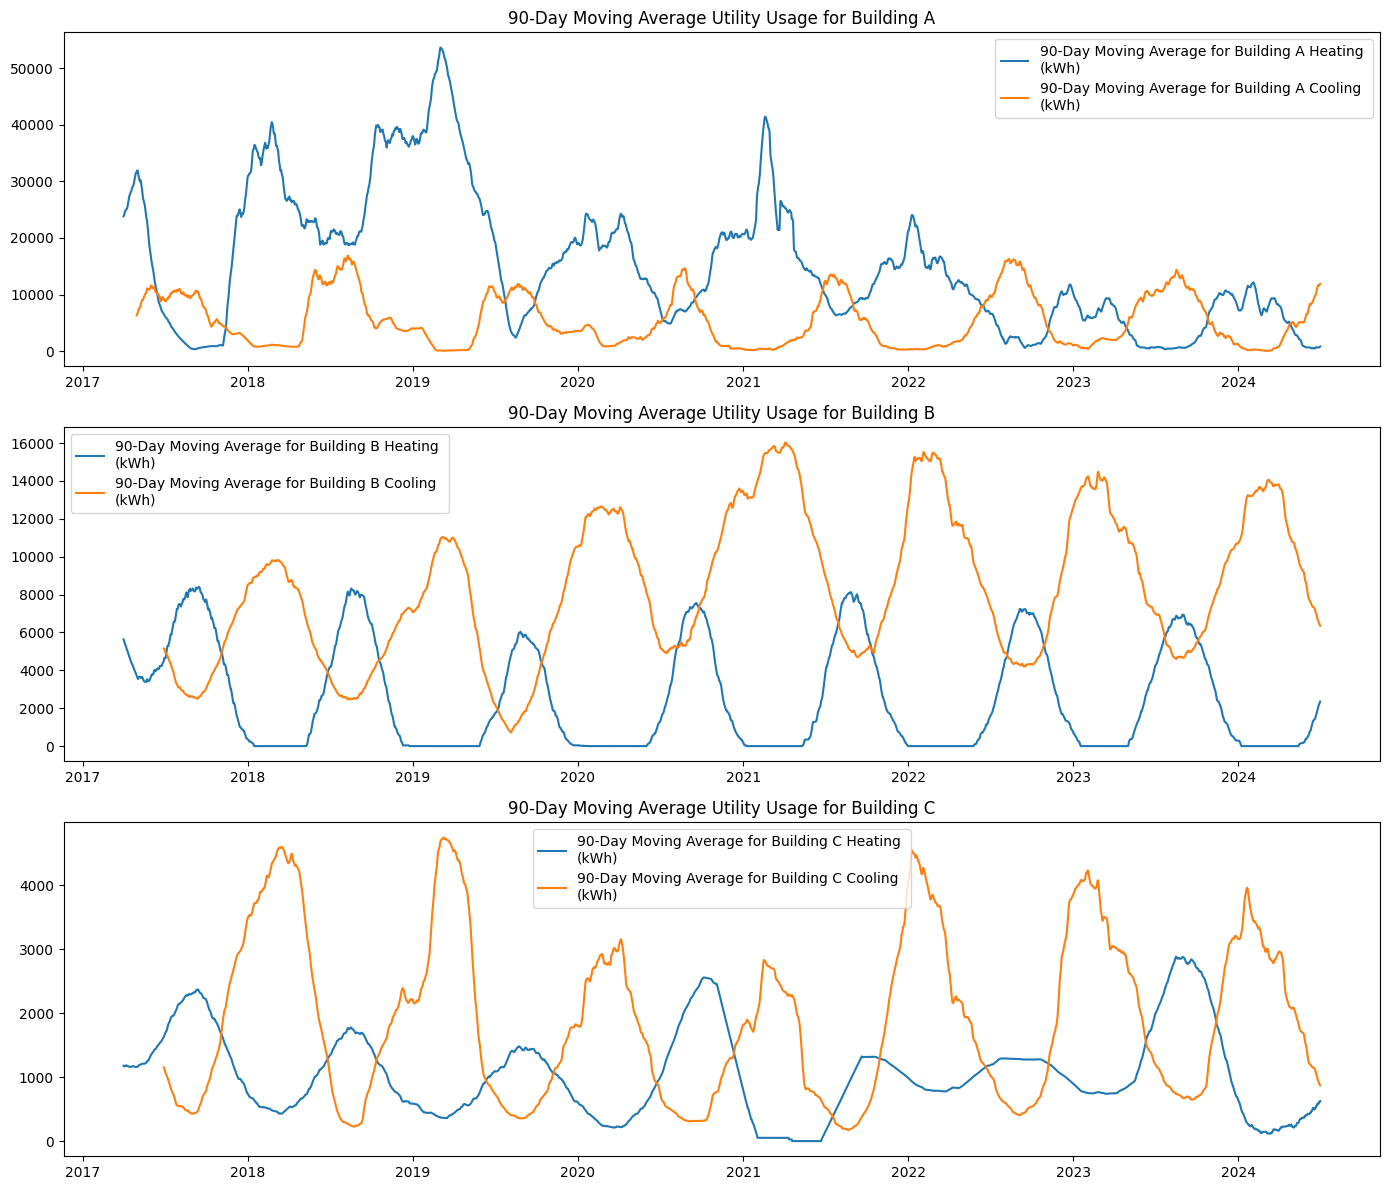

In [43]:
# creating the rolling average for building B 

buildingB = building[(building['Building code'] == 'B')]
buildingB.set_index('Date', inplace=True)
buildingB_moving_avg = buildingB.groupby('Utility')['Usage'].resample('D').mean()
movingavg30B = buildingB_moving_avg.rolling(window=90).mean()

# creating the rolling average for building C

buildingC = building[(building['Building code'] == 'C')]
buildingC.set_index('Date', inplace=True)
buildingC_moving_avg = buildingC.groupby('Utility')['Usage'].resample('D').mean()
movingavg30C = buildingC_moving_avg.rolling(window=90).mean()

# Filtering out only heating and cooling water

buildingASeasons= buildingA[(buildingA['Utility'] == "Heating \n(kWh)") | (buildingA['Utility'] == "Cooling \n(kWh)")].reset_index()
buildingBSeasons= buildingB[(buildingB['Utility'] == "Heating \n(kWh)") | (buildingB['Utility'] == "Cooling \n(kWh)")].reset_index()
buildingBSeasons= buildingC[(buildingC['Utility'] == "Heating \n(kWh)") | (buildingC['Utility'] == "Cooling \n(kWh)")].reset_index()

movingavg30A = buildingA_moving_avg.rolling(window=30).mean()

# Plotting the moving averages

plt.figure(figsize=(14, 12))
for utility in buildingASeasons['Utility'].unique():
    plt.subplot(3, 1, 1)
    plt.plot(movingavg30A[utility], label=f'90-Day Moving Average for Building A {utility}')
    plt.title('90-Day Moving Average Utility Usage for Building A')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(movingavg30B[utility], label=f'90-Day Moving Average for Building B {utility}')
    plt.title('90-Day Moving Average Utility Usage for Building B')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(movingavg30C[utility], label=f'90-Day Moving Average for Building C {utility}')
    plt.title('90-Day Moving Average Utility Usage for Building C')
    plt.legend()
plt.tight_layout()
plt.show()


### Part B Q3 Answer 

Analyzing the line graphs for heating and cooling, I initially chose to examine the data over a 90-day period since weather typically changes within that timeframe or quarterly.

The changes in the graphs indicate a negative correlation between heating and cooling: when one increases, the other decreases. This relationship makes sense; as temperatures drop, the demand for heating in buildings rises, while warmer weather leads to increased cooling water usage.

Comparing the buildings has revealed interesting observation. For instance, Building A requires significantly more heating than the other buildings. This raises questions about whether this indicates a higher occupancy or the type of water usage . Such as use in accommidation buildings where people are taking showers, or have the heater cranked up all day. In contrast, Building C consumes far more kilowatt-hours for cooling than for heating, suggesting an almost opposite pattern. This discrepancy prompts me to consider whether one building has older system or due to how they are made, such as lack of proper insulation, thus requiring more power to operate. Or is it based on what the buidling is used for. 

Another intriguing observation is that cooling water usage peaks at the beginning and end of the year while decreasing in the middle for Building B and C. This trend raises questions about the data, as one might expect higher cooling demands during summer and more heating needs in winter. 


## Part C


### Question 1
Characterize the usage of at least one building over the pandemic. To characterize building use, you may want to consider some or all of the following points:
- When trends or outliers in utility usage happen. 
- Any guesses you have with regards to building occupancy.
- What kind of function (residential, or "work", such as administrative/teaching/learning/research) do you think the building has?
- How is building heating/cooling affected by occupancy? (Again, consider that seasonality may be a factor)
- What is building use like in the present, compared to before the pandemic?

You may want to create plots to illustrate your points, if appropriate.

You may consider some or all of the following dates in your analysis. Again, remember that these dates usually do not mark dramatic transitions (though some do), but should suggest when you may see behaviours begin to change.
- February 28 2020: Travel suspended to countries with positive cases
- March 5 2020: First COVID-19 case in the Province of Alberta
- March 12 2020: Suspension of in-person learning 
- March 16 2020: First on-campus positive case
- March 21 2020: Most faculty/staff directed to work from home
- Late April 2020: End of semester, students move out of residence buildings
- Fall (September) 2020: Minimal in-person learning resumes, most faculty/staff/students are working/learning remotely
- Winter (January) 2021: In-person teaching continues to expand
- Fall 2021: Limited return to campus
- Winter 2022: Expansion of in-person learning and working
- Fall 2022: "Full" return to in-person learning (and working)

(**15 points**)

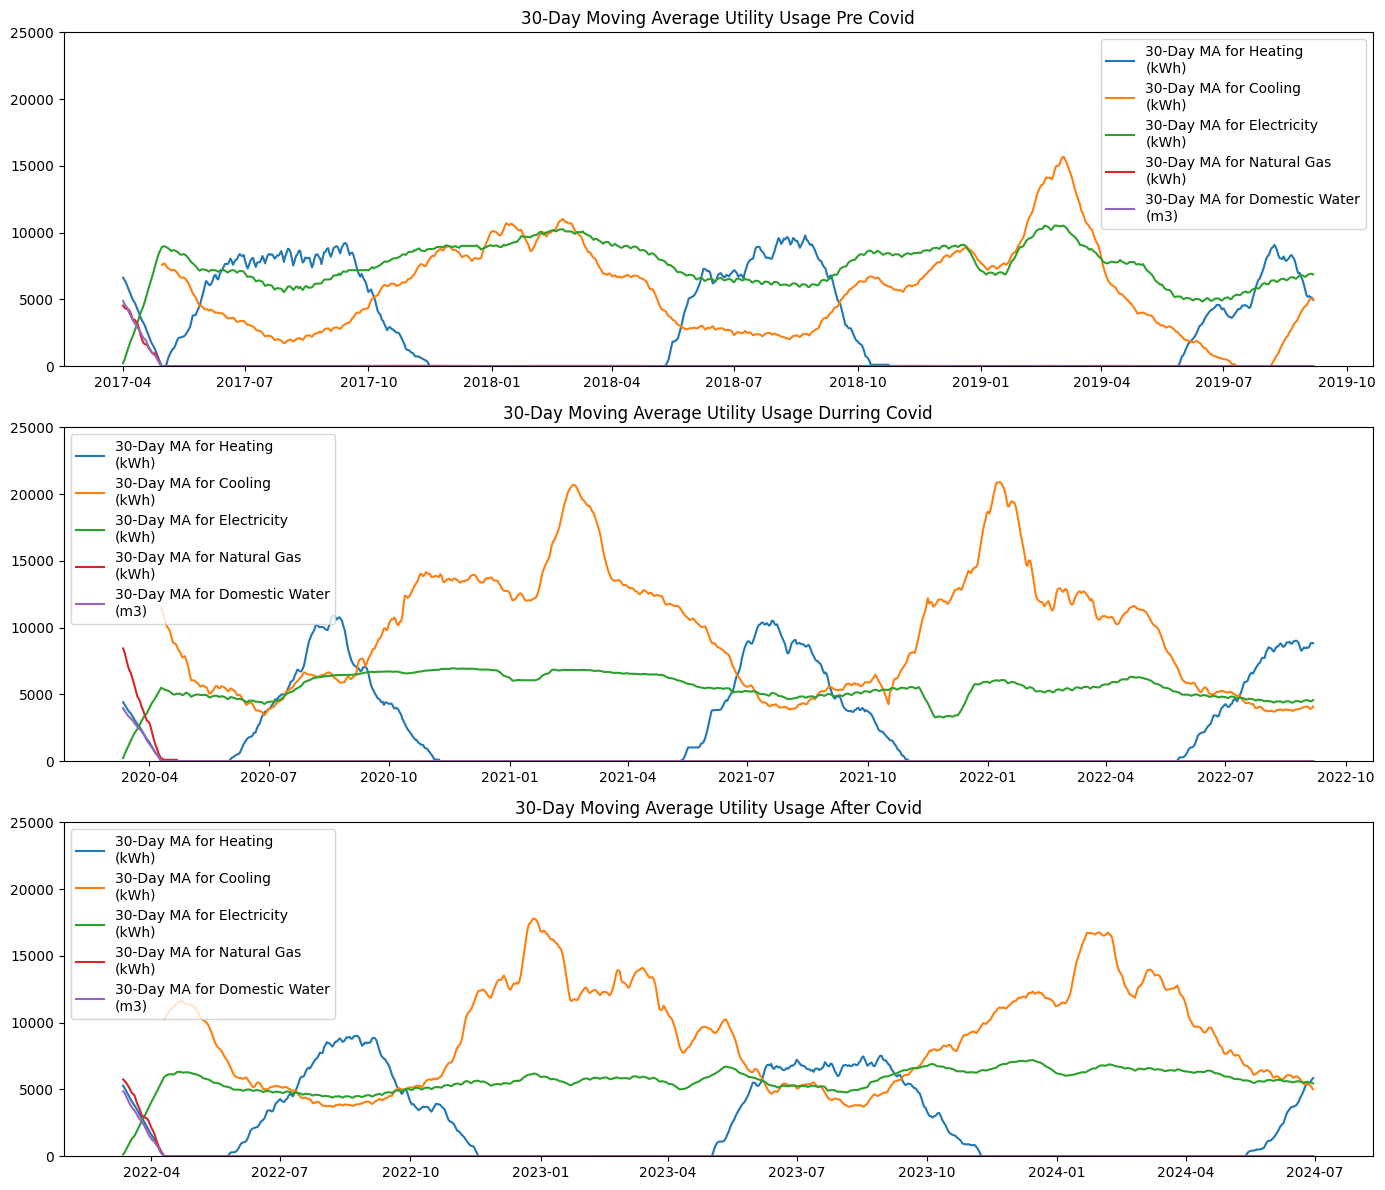

In [44]:


flatdata= building_df.melt(id_vars=['Date', 'Building code'], 
                           var_name='Utility', 
                           value_name='Usage')

# ------------------- Pre Covid Data ---------------------

PreCovidData = flatdata[(flatdata['Building code'] == 'B') & (flatdata['Date'] >= '2017-03-12') & (flatdata['Date'] <= '2019-09-06')].reset_index(drop=True)

# set date as an index
PreCovidData.set_index('Date', inplace=True)

buildingB_moving_avg_pre = PreCovidData.groupby('Utility')['Usage'].resample('D').mean()

# creating a moving rolling average

movingavg30PreCovid = buildingB_moving_avg_pre.rolling(window=30).mean()


# ------------------- Covid Data ---------------------

CovidData = flatdata[(flatdata['Building code'] == 'B') & (flatdata['Date'] >= '2020-03-12') & (flatdata['Date'] <= '2022-09-06')].reset_index(drop=True)

# set date as an index
CovidData.set_index('Date', inplace=True)

buildingB_moving_avg = CovidData.groupby('Utility')['Usage'].resample('D').mean()

# creating a moving rolling average

movingavg30covid= buildingB_moving_avg.rolling(window=30).mean()



# ----------------- After Covid Data --------------------


AfterCovidData = flatdata[(flatdata['Building code'] == 'B') & (flatdata['Date'] >= '2022-03-12') & (flatdata['Date'] <= '2024-09-06')].reset_index(drop=True)

# set date as an index
AfterCovidData.set_index('Date', inplace=True)

buildingB_moving_avg_after_covid = AfterCovidData.groupby('Utility')['Usage'].resample('D').mean()

# creating a moving rolling average

movingavg30Aftercovid = buildingB_moving_avg_after_covid .rolling(window=30).mean()


# ----------------- After Covid Data --------------------

plt.figure(figsize=(14, 12))



# Plotting the moving averages of before and after to see change
for utility in buildingA['Utility'].unique():
    plt.subplot(3, 1, 1)
    plt.plot(movingavg30PreCovid[utility], label=f'30-Day MA for {utility}',)
    plt.title('30-Day Moving Average Utility Usage Pre Covid')
    plt.ylim([0, 25000]) # plotting against the same axis 
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(movingavg30covid[utility], label=f'30-Day MA for {utility}')
    plt.title('30-Day Moving Average Utility Usage Durring Covid')
    plt.ylim([0, 25000])# plotting against the same axis 
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(movingavg30Aftercovid[utility], label=f'30-Day MA for {utility}')
    plt.title('30-Day Moving Average Utility Usage After Covid')
    plt.ylim([0, 25000])# plotting against the same axis 
    plt.legend()


plt.tight_layout()
plt.show()

# References 

#https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot

#https://www.w3schools.com/python/matplotlib_subplot.asp



### Part C Q1 Answer 

For assumptions regarding when COVID began, I’ve set the start date to when 'in-person learning' ceased, as that marked the point when campus occupancy significantly decreased, which i believe would impact utility usage the most.

Analyzing the trends in Building B's utility usage during the same time frame across different years (pre-COVID, during COVID, and post-COVID), it’s evident that heating and electricity were the highest before the pandemic. However, during COVID, usage noticeably decreased. One clear observation is that pre- and post-COVID, the duration of higher heating usage is much longer pre covid than during the pandemic. Where you see small time frames of high heating usage. Which could suggest that some individuals were still using the building hense the heating. However, this inconsistency and lack of need of high utility usage suggests a couple of things about Building B, that its most definitly not a residential space, like the accomidiation housing due to low kwhs of heating usage, and it is likely not somewhere like the TFDL library, where the occupancy is higher which comes with higher electricity, which building B does not show signs of.

Electricity consumption, which is closely tied to occupancy, dropped significantly when COVID hit. Meanwhile, heating and cooling remained relatively high, which could indicate that the HVAC systems were still operating in the building during that period.

Looking at the current post-COVID data, it appears that electricity usage has not returned to pre-COVID levels in Building B. This could be due to fewer people using the space, the opening of other buildings, or certain sections of Building B still being closed off.

### Question 2

Create an analysis which could help you suggest a use for at least one building. You may need to see if patterns of utility use in one building is different from the others. (**8 points**)

### Part C Q2 Answer 

Looking at the trends of the usage of building B given the same time frame at different years, pre, covid and post. It definity seems as though this may be like an admin building. In which precovid, lots of admins where working from office, and hence using up the electricity. Durring covid, most people began to work from home which explains the slowed down the electricity. And now, lots of people still work from home a couple days a week, which would explain why we still have low electricity usage. 

When even comparing it to building A, theres a huge diffrence in utility usage, which makes me assume its a residential building, where heating is needed constantly for the HVAC system and heating water.


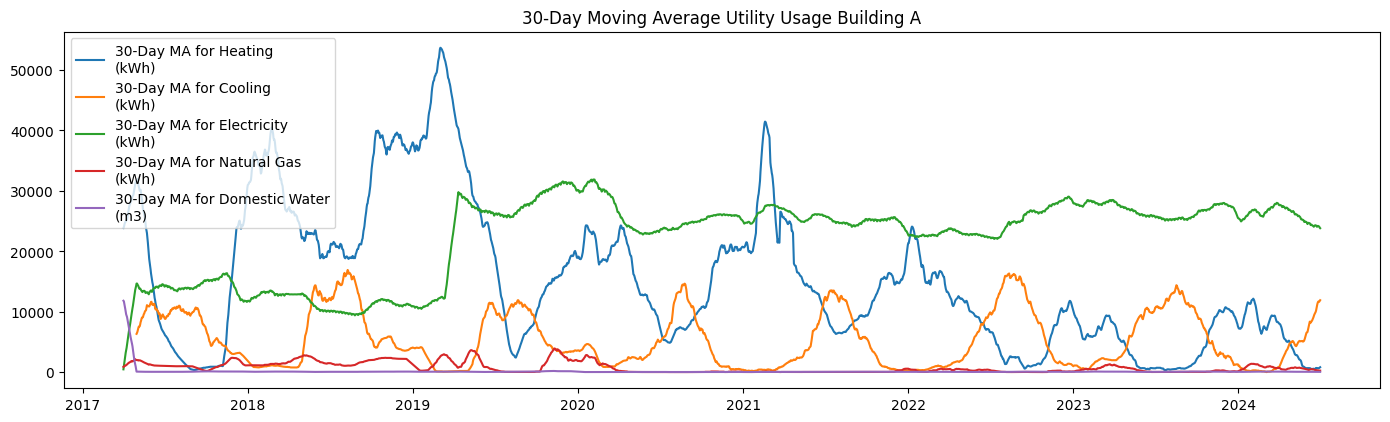

In [45]:
# playing aroung with building A 
plt.figure(figsize=(14, 12))
for utility in buildingA['Utility'].unique():
    
    plt.subplot(3, 1, 1)
    plt.plot(movingavg30[utility], label=f'30-Day MA for {utility}')
    plt.title('30-Day Moving Average Utility Usage Building A')
    plt.legend()


plt.tight_layout()
plt.show()

Looking in comparision to other buildings like A, in the previous question ^^

## Part D

Provide your answers to the following questions in the Markdown cell below. (**12 points**)

Identify some method, functionality or technique in `numpy`, `pandas`, or `matplotlib` which you had to experiment with for the first time in this assignment. 

- How did you learn about this method or technique? Did you move beyond the documentation for the relevant library, or provided materials?

- Would you use the same approach to learn a new method or technique in the same library in the future? If not, how would you change what you do?

What kinds of other data would you want to incorporate as part of this analysis to make your results stronger? Suggest one or two other datasets (these may be available from the City of Calgary as Open Data, or from federal bodies such as Environment Canada).

Is there something you have learned about campus infrastructure or sustainability which was new or different for you? What might you need to learn to make your work in this assignment more informative?



### Part D Answer 

Some of the fucntions i used for the first time are : {fillna, plt.subplot, set_index, unique, melt}

Q - How did you learn about this method or technique? Did you move beyond the documentation for the relevant library, or provided materials?
 
A - Yes, for the wide implication of these functions, i used many websites to learn about their uses and how to operate them. The websites that helped me the most were Stack Overflow and GeeksforGeeks. What I liked about Stack Overflow is that many people have the same questions I do, and the answers often break down the problem well. GeeksforGeeks, on the other hand, provided detailed explanations of each function and various ways to use them in different scenarios.
 
Q - Would you use the same approach to learn a new method or technique in the same library in the future? If not, how would you change what you do?

A - Yes, i think i would. I am a very hands on learner, in order for me to learn, i need to try it out on my own the learn from my mistakes. This way  the functions stick to me much faster. Also this assignment served as a way to practise even more. Which helped alot as well.

Q  - What kinds of other data would you want to incorporate as part of this analysis to make your results stronger? Suggest one or two other datasets (these may be available from the City of Calgary as Open Data, or from federal bodies such as Environment Canada).

A - I would like to incorporate building square footage. This would help me normalize the data across different buildings, as well as standardize usage across various buildings in Calgary. This would allow me to see whether students' consumption is among the highest in the city, or if we are performing better than most. Right now, I’m not sure what the normal range of usage is, and normalizing the data would give me a better understanding of what is considered high for a building versus what is not.

Q - Is there something you have learned about campus infrastructure or sustainability which was new or different for you? What might you need to learn to make your work in this assignment more informative?

A - In all honesty, I didn’t know how utilities worked at all. Reading up on it has helped a bit, but I wish I had a deeper understanding so that when I conduct my analysis, I wouldn’t have to guess so much. Instead, I would know how the systems operate to achieve certain results.
